In [124]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from io import BytesIO

In [126]:
def get_avatar_image(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Ошибка загрузки аватара: {e}")
        return None

In [128]:
with open('team_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [130]:
G = nx.Graph()

In [132]:
team_members = {}
for member_name, member_info in data['team'].items():
    member_id = int(member_info['id'])
    team_members[member_id] = member_name
    G.add_node(member_id, label=member_name, photo=member_info['photo'])
    for friend in member_info['friends']:
        friend_id = friend['id']
        G.add_node(friend_id, label=friend['name'], photo=friend['photo'])
        G.add_edge(member_id, friend_id)

In [150]:
# Центральность по посредничеству
betweenness_centrality = nx.betweenness_centrality(G)

# Центральность по близости
closeness_centrality = nx.closeness_centrality(G)

# Центральность собственного вектора
eigenvector_centrality = nx.eigenvector_centrality(G)

# Вывод центральностей только для членов команды
for member_id, member_name in team_members.items():
    print(f"Центральности для {member_name}:")
    print(f"  Центральность по посредничеству: {betweenness_centrality.get(member_id, 0):.4f}")
    print(f"  Центральность по близости: {closeness_centrality.get(member_id, 0):.4f}")
    print(f"  Центральность собственного вектора: {eigenvector_centrality.get(member_id, 0):.4f}")
    print()

Центральности для Александр Краснов:
  Центральность по посредничеству: 0.7537
  Центральность по близости: 0.5803
  Центральность собственного вектора: 0.7043

Центральности для Мария Чиркова:
  Центральность по посредничеству: 0.3681
  Центральность по близости: 0.4943
  Центральность собственного вектора: 0.0706

Центральности для Danil Egorkin:
  Центральность по посредничеству: 0.4792
  Центральность по близости: 0.5158
  Центральность собственного вектора: 0.0673

Центральности для Человек Без-Имени:
  Центральность по посредничеству: 0.2164
  Центральность по близости: 0.2879
  Центральность собственного вектора: 0.0003



In [152]:
# Определяем расположение узлов
pos = nx.spring_layout(G, k=0.13)

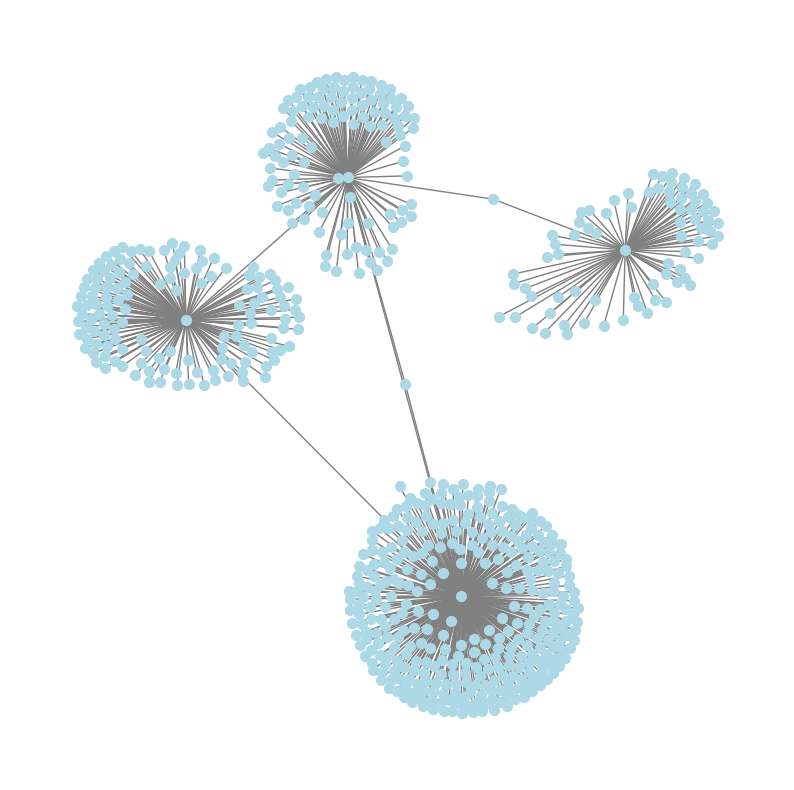

In [153]:
# Отображаем связи
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=50, edge_color='gray', node_color='lightblue', ax=ax)

In [156]:
hover_labels = {}
for node in G.nodes(data=True):
    avatar_url = node[1]['photo']
    avatar_img = get_avatar_image(avatar_url)
    if avatar_img is not None:
        imagebox = OffsetImage(avatar_img, zoom=0.2)
        ab = AnnotationBbox(imagebox, pos[node[0]], frameon=False)
        ax.add_artist(ab)
        hover_labels[ab] = node[1]['label']
    else:
        print(f"Не удалось загрузить изображение для {node[1]['label']}")

In [157]:
def hover(event):
    if event.inaxes == ax:
        for ab in hover_labels:
            if ab.contains(event.xdata, event.ydata)[0]:
                ax.set_title(hover_labels[ab])
                plt.draw()
                return
        ax.set_title("")
        plt.draw()

fig.canvas.mpl_connect('motion_notify_event', hover)

plt.show()